<a href="https://colab.research.google.com/github/WheelerMLClub/Python-and-Math-Review/blob/master/Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('Introduction.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Lets take some sample points

In [2]:

from IPython.display import HTML
from base64 import b64encode
mp4 = open('Graph.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [3]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('BestFitExplanation.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [4]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('Residuals.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [5]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('Methods.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [6]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('NormalEquasion.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Lets try it, load a dataset.

In [7]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("/content/sample_data/california_housing_train.csv")
dataset.head()

longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0

[5 rows x 9 columns]

In [110]:
X = dataset["total_bedrooms"][5400:5600]
y = dataset["total_rooms"][5400:5600]

X_n = np.stack([X,np.ones(X.shape)],0).T
X_n[0:5]

array([[5.590e+02, 1.000e+00],
       [2.590e+02, 1.000e+00],
       [2.490e+02, 1.000e+00],
       [1.067e+03, 1.000e+00],
       [2.520e+02, 1.000e+00]])

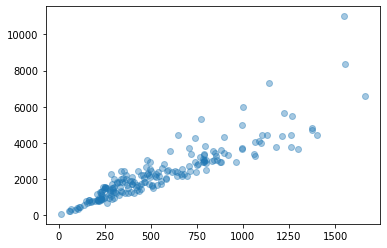

In [111]:
import matplotlib.pyplot as plt
plt.scatter(X,y,alpha=.4)

Now lets make a function for the normal equation 

In [112]:
#Normal Equation ((X.T*X)^-1)*(X.T*y)
def normal_equation(X,y):
  return np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))

Lets run

In [113]:
theta = normal_equation(X_n,y)

In [114]:
theta

array([  3.93433549, 149.00354377])

In [120]:
line = lambda x:x*theta[0]+theta[1]

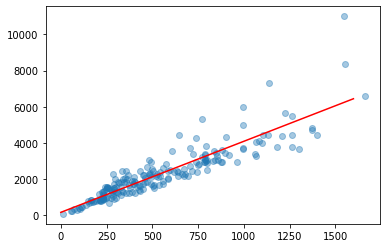

In [121]:
import matplotlib.pyplot as plt
plt.scatter(X,y,alpha=.4)
plt.plot(np.arange(0,1600),line(np.arange(0,1600)),color="red")

Lets try and run this with polynomials

In [141]:
point_generator = lambda x: 3*x**2 - 2*x**3
X = np.arange(0,5,.1)
y = point_generator(X) + np.random.normal(0,10,size=X.shape)

X_n = np.stack([X**4,X**3,X**2,X,X**0]).T

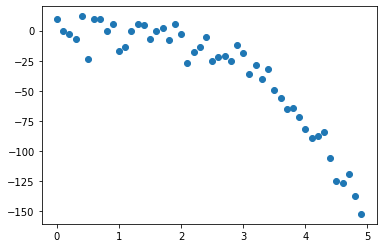

In [144]:
plt.scatter(X,y)

In [145]:
theta = normal_equation(X_n,y)

In [148]:
theta

array([  0.21295722,  -4.00576951,  10.58016911, -11.75076343,
         2.94444104])

In [149]:
reg = lambda x: theta[0]*x**4 + theta[1]*x**3 + theta[2]*x**2 + theta[3]*x + theta[4]

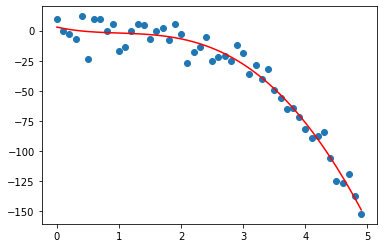

In [152]:
plot_domain = np.arange(0,5,.1)
plt.plot(plot_domain,reg(plot_domain),color="red")
plt.scatter(X,y)